In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import (
    silhouette_score, calinski_harabasz_score, davies_bouldin_score,
    normalized_mutual_info_score, adjusted_rand_score,
    adjusted_mutual_info_score, v_measure_score,
    completeness_score, homogeneity_score
)

In [2]:
data = pd.read_csv('smoke_detection_iot.csv')
data = data.drop(columns=['Unnamed: 0', 'UTC'])

In [3]:
data

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

In [5]:
data

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [6]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [7]:
scaled_data

array([[ 0.28062169,  0.99494707, -0.24861434, ..., -0.07388861,
        -1.38347572, -1.58245641],
       [ 0.2816663 ,  0.91711549, -0.24861434, ..., -0.07388861,
        -1.38334411, -1.58245641],
       [ 0.28264127,  0.83702792, -0.24861434, ..., -0.07388861,
        -1.38321249, -1.58245641],
       ...,
       [ 0.20171901, -3.68848353, -0.16834834, ..., -0.07387569,
        -0.62786328, -1.58245641],
       [ 0.21676136, -3.66592365, -0.16694016, ..., -0.07387569,
        -0.62773167, -1.58245641],
       [ 0.23180371, -3.61177995, -0.16630008, ..., -0.07387569,
        -0.62760005, -1.58245641]])

In [8]:
# ONLY FOR KMEAN
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(scaled_data)




/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
labels 

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [10]:
silhouette = silhouette_score(scaled_data, labels)
calinski_harabasz = calinski_harabasz_score(scaled_data, labels)
davies_bouldin = davies_bouldin_score(scaled_data, labels)
normalized_mutual_info = normalized_mutual_info_score(data['Fire Alarm'].values, labels)
adjusted_rand = adjusted_rand_score(data['Fire Alarm'].values, labels)
adjusted_mutual_info = adjusted_mutual_info_score(data['Fire Alarm'].values, labels)
v_measure = v_measure_score(data['Fire Alarm'].values, labels)
completeness = completeness_score(data['Fire Alarm'].values, labels)
homogeneity = homogeneity_score(data['Fire Alarm'].values, labels)


print(f"Silhouette Score: {silhouette:.4f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz:.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin:.4f}")
print(f"Normalized Mutual Info: {normalized_mutual_info:.4f}")
print(f"Adjusted Rand Index: {adjusted_rand:.4f}")
print(f"Adjusted Mutual Info: {adjusted_mutual_info:.4f}")
print(f"V-Measure: {v_measure:.4f}")
print(f"Completeness Score: {completeness:.4f}")
print(f"Homogeneity Score: {homogeneity:.4f}")


Silhouette Score: 0.8683
Calinski-Harabasz Score: 36688.2531
Davies-Bouldin Score: 0.6183
Normalized Mutual Info: 0.0187
Adjusted Rand Index: 0.0225
Adjusted Mutual Info: 0.0186
V-Measure: 0.0187
Completeness Score: 0.1067
Homogeneity Score: 0.0102


/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


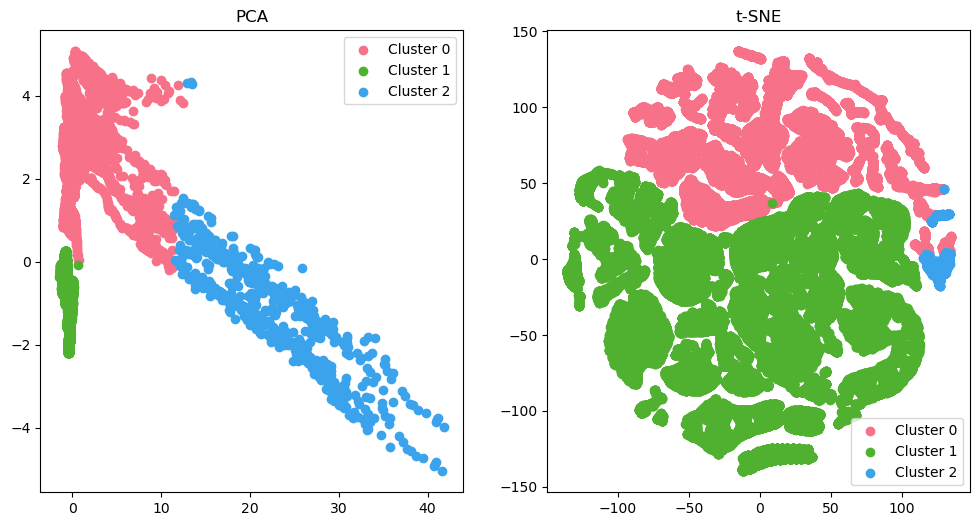

In [11]:
import seaborn as sns

# Apply dimensionality reduction techniques
pca = PCA(n_components=2)
tsne = TSNE(n_components=2)

pca_result = pca.fit_transform(scaled_data)
tsne_result = tsne.fit_transform(scaled_data)

# Cluster the data (you need to specify the number of clusters)
num_clusters = 3  # Replace with your desired number of clusters
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(scaled_data)

# Create a DataFrame to store the reduced data and cluster labels
reduced_df = pd.DataFrame({'PCA1': pca_result[:, 0], 'PCA2': pca_result[:, 1], 't-SNE1': tsne_result[:, 0], 't-SNE2': tsne_result[:, 1], 'Cluster': cluster_labels})

# Create a color palette for the clusters
palette = sns.color_palette("husl", num_clusters)  # You can choose a different palette if needed

# Create subplots for PCA and t-SNE with different colors for clusters
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for cluster in range(num_clusters):
    plt.scatter(reduced_df[reduced_df['Cluster'] == cluster]['PCA1'], reduced_df[reduced_df['Cluster'] == cluster]['PCA2'], label=f'Cluster {cluster}', color=palette[cluster])

plt.title("PCA")
plt.legend()

plt.subplot(1, 2, 2)
for cluster in range(num_clusters):
    plt.scatter(reduced_df[reduced_df['Cluster'] == cluster]['t-SNE1'], reduced_df[reduced_df['Cluster'] == cluster]['t-SNE2'], label=f'Cluster {cluster}', color=palette[cluster])

plt.title("t-SNE")
plt.legend()

# Save the plots as PNG and PDF
plt.savefig('cluster_plot.png', format='png')
plt.savefig('cluster_plot.pdf', format='pdf')

# Show the plots
plt.show()


In [12]:
# Generic code

In [ ]:
from sklearn.metrics import (
    silhouette_score, calinski_harabasz_score, davies_bouldin_score,
    normalized_mutual_info_score, adjusted_rand_score,
    adjusted_mutual_info_score, v_measure_score,
    completeness_score, homogeneity_score
)

# Define a function to evaluate clustering metrics for a given model
def evaluate_clustering_metrics(model, data, scaled_data):
    labels = model.fit_predict(scaled_data)
    evaluation_metricsx = {
        'Silhouette Score': silhouette_score(scaled_data, labels),
        'Calinski-Harabasz Score': calinski_harabasz_score(scaled_data, labels),
        'Davies-Bouldin Score': davies_bouldin_score(scaled_data, labels),
        'Normalized Mutual Info': normalized_mutual_info_score(data['Fire Alarm'].values, labels),
        'Adjusted Rand Index': adjusted_rand_score(data['Fire Alarm'].values, labels),
        'Adjusted Mutual Info': adjusted_mutual_info_score(data['Fire Alarm'].values, labels),
        'V-Measure': v_measure_score(data['Fire Alarm'].values, labels),
        'Completeness Score': completeness_score(data['Fire Alarm'].values, labels),
        'Homogeneity Score': homogeneity_score(data['Fire Alarm'].values, labels),
    }
    return evaluation_metricsx

# Initialize a list to store clustering models
clustering_models = [
    KMeans(n_clusters=2),
    KMeans(n_clusters=3),
    AgglomerativeClustering(n_clusters=2),
    AgglomerativeClustering(n_clusters=3),
    SpectralClustering(n_clusters=2),
    SpectralClustering(n_clusters=3)
]

lx =[]
# Loop through all clustering models and evaluate metrics
for model in clustering_models:
    d = []
    print(f"Model: {model.__class__.__name__}")
    metrics = evaluate_clustering_metrics(model, data, scaled_data)
    for metric_name, score in metrics.items():
        print(f"{metric_name}: {score:.4f}")
        d.append(score)
    lx.append(d)
    print()
    

Model: KMeans


/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.8683
Calinski-Harabasz Score: 36688.2531
Davies-Bouldin Score: 0.6183
Normalized Mutual Info: 0.0187
Adjusted Rand Index: 0.0225
Adjusted Mutual Info: 0.0186
V-Measure: 0.0187
Completeness Score: 0.1067
Homogeneity Score: 0.0102

Model: KMeans


/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.4513
Calinski-Harabasz Score: 33656.4829
Davies-Bouldin Score: 1.0591
Normalized Mutual Info: 0.8448
Adjusted Rand Index: 0.9207
Adjusted Mutual Info: 0.8448
V-Measure: 0.8448
Completeness Score: 0.8061
Homogeneity Score: 0.8875

Model: AgglomerativeClustering
Silhouette Score: 0.8698
Calinski-Harabasz Score: 35090.9228
Davies-Bouldin Score: 0.6097
Normalized Mutual Info: 0.0143
Adjusted Rand Index: 0.0189
Adjusted Mutual Info: 0.0142
V-Measure: 0.0143
Completeness Score: 0.0864
Homogeneity Score: 0.0078

Model: AgglomerativeClustering


In [14]:
df_res = pd.DataFrame(lx,index=clustering_models,columns= metrics.keys())

NameError: name 'lx' is not defined

In [15]:
df_res

NameError: name 'df_res' is not defined